In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import h5py
data = h5py.File('/content/drive/My Drive/Colab Notebooks/Notebooks/SVHN_single_grey1.h5','r')

In [0]:
x_train = data['X_train'][:]
y_train = data['y_train'][:]
x_test = data['X_test'][:]
y_test = data['y_test'][:]


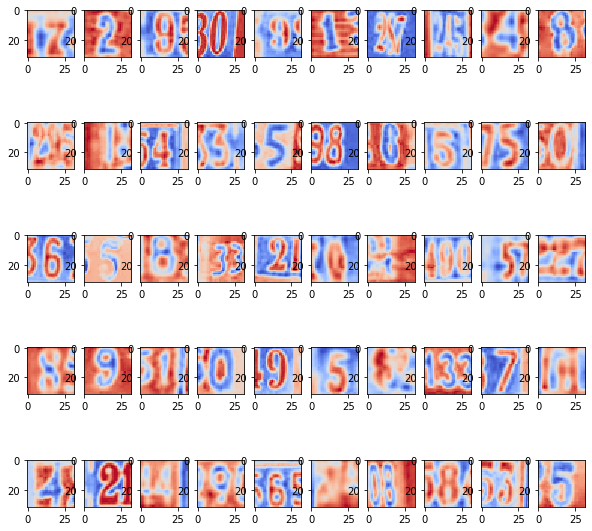

In [16]:
#visualising the data
%matplotlib inline

import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(10, 10))
columns = 10
rows = 5
for i in range(1,51):
    img = x_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='coolwarm')
plt.show()

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)


In [0]:
#Reshape train and test sets into shapes compatible with keras models

x_train = x_train.reshape(x_train.shape[0],32,32,1)
x_test = x_test.reshape(x_test.shape[0],32,32,1)


In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(42000, 32, 32, 1)
(42000,)
(18000, 32, 32, 1)
(18000,)


In [23]:
import keras
y_train = keras.utils.to_categorical(y_train)
y_test  = keras.utils.to_categorical(y_test)
y_train[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [28]:
x_train[0][0][0] #dtype is float32

array([33.0704], dtype=float32)

In [0]:
x_train = x_train/255.0
x_test = x_test/255.0

In [1]:
#building CNN
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense ,Reshape,BatchNormalization

Using TensorFlow backend.


In [5]:
model = Sequential(name="SVHN")


model.add(Conv2D(32, kernel_size=3,activation='relu',input_shape=(32,32,1),name='conv1'))
model.add(MaxPool2D(pool_size=(2, 2),name='max1'))
model.add(Dropout(0.25,name='drop1'))

model.add(Conv2D(64, kernel_size=4, activation='relu',name='conv2'))
model.add(MaxPool2D(pool_size=(2, 2),name='max2'))
model.add(Dropout(0.3,name='drop2'))


model.add(Flatten())

model.add(Dense(128, activation='relu',name='dense1'))

model.add(Dropout(0.5,name='drop3'))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(10, activation='softmax',name='dense2'))

In [6]:
model.summary()

Model: "SVHN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 30, 30, 32)        320       
_________________________________________________________________
max1 (MaxPooling2D)          (None, 15, 15, 32)        0         
_________________________________________________________________
drop1 (Dropout)              (None, 15, 15, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 12, 12, 64)        32832     
_________________________________________________________________
max2 (MaxPooling2D)          (None, 6, 6, 64)          0         
_________________________________________________________________
drop2 (Dropout)              (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0      

In [37]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [38]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=600)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 42000 samples, validate on 18000 samples
Epoch 1/20





42000/42000 [==============================] - 61s 1ms/step - loss: 2.3006 - acc: 0.1155 - val_loss: 2.2742 - val_acc: 0.2979
Epoch 2/20
42000/42000 [==============================] - 60s 1ms/step - loss: 1.8348 - acc: 0.3911 - val_loss: 1.0742 - val_acc: 0.7273
Epoch 3/20
42000/42000 [==============================] - 60s 1ms/step - loss: 1.0483 - acc: 0.6763 - val_loss: 0.6927 - val_acc: 0.8236
Epoch 4/20
42000/42000 [==============================] - 60s 1ms/step - loss: 0.8209 - acc: 0.7546 - val_loss: 0.5851 - val_acc: 0.8434
Epoch 5/20
42000/42000 [==============================] - 60s 1ms/step - loss: 0.7129 - acc: 0.7858 - val_loss: 0.5116 - val_acc: 0.8619
Epoch 6/20
42000/42000 [==============================] - 59s 1ms/step - loss: 0.6545 - acc: 0.8017 - val_loss: 0.4781 - val_acc: 0.8691
Epoch 7/20
42000/42000 [==

In [41]:
#Checking for 10 more iterations
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=100)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 71s 2ms/step - loss: 0.4657 - acc: 0.8572 - val_loss: 0.3435 - val_acc: 0.9009
Epoch 2/10
42000/42000 [==============================] - 71s 2ms/step - loss: 0.4346 - acc: 0.8669 - val_loss: 0.3279 - val_acc: 0.9056
Epoch 3/10
42000/42000 [==============================] - 72s 2ms/step - loss: 0.4125 - acc: 0.8739 - val_loss: 0.3290 - val_acc: 0.9027
Epoch 4/10
42000/42000 [==============================] - 71s 2ms/step - loss: 0.4026 - acc: 0.8761 - val_loss: 0.3199 - val_acc: 0.9062
Epoch 5/10
42000/42000 [==============================] - 71s 2ms/step - loss: 0.3906 - acc: 0.8793 - val_loss: 0.3096 - val_acc: 0.9109
Epoch 6/10
42000/42000 [==============================] - 71s 2ms/step - loss: 0.3763 - acc: 0.8838 - val_loss: 0.3122 - val_acc: 0.9104
Epoch 7/10
42000/42000 [==============================] - 72s 2ms/step - loss: 0.3716 - acc: 0.8845 - val_loss: 0.3033 - val_acc

In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/Notebooks/MY_SVHN_model.h5')
model.save_weights('/content/drive/My Drive/Colab Notebooks/Notebooks/MY_SVHN_weights.h5')

In [44]:
#Testing the model on test set
score = model.evaluate(x_train, y_train)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

42000/42000 [==============================] - 25s 590us/step
Train loss: 0.2027666919699737
Train accuracy: 0.9444285714285714


In [43]:
#Testing the model on test set
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

18000/18000 [==============================] - 11s 594us/step
Test loss: 0.30896927730242413
Test accuracy: 0.9121111111111111


In [0]:
#Working with KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
KNN = KNeighborsClassifier(n_neighbors=5)

In [0]:
#KNN.fit(x_train)
x_train_knn = x_train.reshape(42000,1024)
x_test_knn = x_test.reshape(18000,1024)

In [53]:
x_train_knn.shape

(42000, 1024)

In [57]:
x_train_knn[0]

array([0.12968785, 0.11866706, 0.10530196, ..., 0.19477727, 0.19942354,
       0.20799099], dtype=float32)

In [60]:
x_train[0][0][:3]

array([[0.12968785],
       [0.11866706],
       [0.10530196]], dtype=float32)

In [0]:
y_train = data['y_train'][:]
y_test = data['y_test'][:]
#KNN.fit(x_train_knn,y_)

In [62]:
y_train[0]

2

In [63]:
y_train.shape

(42000,)

In [67]:
KNN.fit(x_train_knn,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn = KNN.predict(x_test_knn)

In [69]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred_knn) 

metrics.accuracy_score(y_test, y_pred_knn)

0.49016666666666664


**CONCLUSION**

---


1.   **When we use classical ML model with KNN algorithm the accuracy is very low i.e 49%**
2. ** When we used Deep Neural Network , the model is very well able to identify the patterns in the images and we saw the test accuracy reached upto 91% **





